<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.219307,29.873167,62.634745,72.094229,-0.370135,231.451313,231.762742,-0.311429
1,0.0,1.0,49.423998,83.443525,90.842291,31.366838,-0.042658,265.033994,265.075560,-0.041566
2,0.0,2.0,46.696654,58.185542,87.963145,99.023041,-0.211006,301.657375,301.768807,-0.111431
3,0.0,3.0,24.127816,50.066746,56.251098,79.983904,-0.175994,220.253570,220.396484,-0.142914
4,0.0,4.0,37.666763,21.870668,96.951326,36.962978,0.241857,203.693592,203.416681,0.276911
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.776215,26.359302,52.344671,84.043047,0.178453,234.701688,234.533247,0.168440
119996,999.0,116.0,91.691433,35.159809,31.310792,62.225883,0.281045,230.668962,230.391491,0.277471
119997,999.0,117.0,70.632915,53.372056,30.602123,41.182161,0.229727,206.018982,205.767268,0.251714
119998,999.0,118.0,92.511569,49.135070,73.983631,96.529370,-0.112910,322.046730,322.185546,-0.138816


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.219307,29.873167,62.634745,72.094229,-0.370135,231.451313,231.762742,-0.311429
1,0.0,1.0,49.423998,83.443525,90.842291,31.366838,-0.042658,265.033994,265.075560,-0.041566
2,0.0,2.0,46.696654,58.185542,87.963145,99.023041,-0.211006,301.657375,301.768807,-0.111431
3,0.0,3.0,24.127816,50.066746,56.251098,79.983904,-0.175994,220.253570,220.396484,-0.142914
4,0.0,4.0,37.666763,21.870668,96.951326,36.962978,0.241857,203.693592,203.416681,0.276911
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.776215,26.359302,52.344671,84.043047,0.178453,234.701688,234.533247,0.168440
119996,999.0,116.0,91.691433,35.159809,31.310792,62.225883,0.281045,230.668962,230.391491,0.277471
119997,999.0,117.0,70.632915,53.372056,30.602123,41.182161,0.229727,206.018982,205.767268,0.251714
119998,999.0,118.0,92.511569,49.135070,73.983631,96.529370,-0.112910,322.046730,322.185546,-0.138816


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.219307  29.873167  62.634745  72.094229 -0.370135  231.451313   
      1.0    49.423998  83.443525  90.842291  31.366838 -0.042658  265.033994   
      2.0    46.696654  58.185542  87.963145  99.023041 -0.211006  301.657375   
      3.0    24.127816  50.066746  56.251098  79.983904 -0.175994  220.253570   
      4.0    37.666763  21.870668  96.951326  36.962978  0.241857  203.693592   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  61.776215  26.359302  52.344671  84.043047  0.178453  234.701688   
      116.0  91.691433  35.159809  31.310792  62.225883  0.281045  230.668962   
      117.0  70.632915  53.372056  30.602123  41.182161  0.229727  206.018982   
      118.0  92.511569  49.135070  73.983631  96.529370 -0.112910  322.046730   
      119.0  64.511647  42.634249  32.183896  27.186870 -0.101318  176.415344   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    231.762742 -0.311429  
      1.0    265.075560 -0.041566  
      2.0    301.768807 -0.111431  
      3.0    220.396484 -0.142914  
      4.0    203.416681  0.276911  
...                 ...       ...  
999.0 115.0  234.533247  0.168440  
      116.0  230.391491  0.277471  
      117.0  205.767268  0.251714  
      118.0  322.185546 -0.138816  
      119.0  176.487564 -0.072220  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.219307  29.873167  62.634745  72.094229 -0.370135  231.451313   
      1.0    49.423998  83.443525  90.842291  31.366838 -0.042658  265.033994   
      2.0    46.696654  58.185542  87.963145  99.023041 -0.211006  301.657375   
      3.0    24.127816  50.066746  56.251098  79.983904 -0.175994  220.253570   
      4.0    37.666763  21.870668  96.951326  36.962978  0.241857  203.693592   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  61.776215  26.359302  52.344671  84.043047  0.178453  234.701688   
      116.0  91.691433  35.159809  31.310792  62.225883  0.281045  230.668962   
      117.0  70.632915  53.372056  30.602123  41.182161  0.229727  206.018982   
      118.0  92.511569  49.135070  73.983631  96.529370 -0.112910  322.046730   
      119.0  64.511647  42.634249  32.183896  27.186870 -0.101318  176.415344   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    231.762742 -0.311429  
      1.0    265.075560 -0.041566  
      2.0    301.768807 -0.111431  
      3.0    220.396484 -0.142914  
      4.0    203.416681  0.276911  
...                 ...       ...  
999.0 115.0  234.533247  0.168440  
      116.0  230.391491  0.277471  
      117.0  205.767268  0.251714  
      118.0  322.185546 -0.138816  
      119.0  176.487564 -0.072220  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.219307,29.873167,62.634745,72.094229,-0.370135,231.451313,231.762742,-0.311429
1,0.0,1.0,49.423998,83.443525,90.842291,31.366838,-0.042658,265.033994,265.075560,-0.041566
2,0.0,2.0,46.696654,58.185542,87.963145,99.023041,-0.211006,301.657375,301.768807,-0.111431
3,0.0,3.0,24.127816,50.066746,56.251098,79.983904,-0.175994,220.253570,220.396484,-0.142914
4,0.0,4.0,37.666763,21.870668,96.951326,36.962978,0.241857,203.693592,203.416681,0.276911
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.776215,26.359302,52.344671,84.043047,0.178453,234.701688,234.533247,0.168440
119996,999.0,116.0,91.691433,35.159809,31.310792,62.225883,0.281045,230.668962,230.391491,0.277471
119997,999.0,117.0,70.632915,53.372056,30.602123,41.182161,0.229727,206.018982,205.767268,0.251714
119998,999.0,118.0,92.511569,49.135070,73.983631,96.529370,-0.112910,322.046730,322.185546,-0.138816


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.219307  29.873167  62.634745  72.094229 -0.370135  231.451313   
      1.0    49.423998  83.443525  90.842291  31.366838 -0.042658  265.033994   
      2.0    46.696654  58.185542  87.963145  99.023041 -0.211006  301.657375   
      3.0    24.127816  50.066746  56.251098  79.983904 -0.175994  220.253570   
      4.0    37.666763  21.870668  96.951326  36.962978  0.241857  203.693592   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  61.776215  26.359302  52.344671  84.043047  0.178453  234.701688   
      116.0  91.691433  35.159809  31.310792  62.225883  0.281045  230.668962   
      117.0  70.632915  53.372056  30.602123  41.182161  0.229727  206.018982   
      118.0  92.511569  49.135070  73.983631  96.529370 -0.112910  322.046730   
      119.0  64.511647  42.634249  32.183896  27.186870 -0.101318  176.415344   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    231.762742 -0.311429  
      1.0    265.075560 -0.041566  
      2.0    301.768807 -0.111431  
      3.0    220.396484 -0.142914  
      4.0    203.416681  0.276911  
...                 ...       ...  
999.0 115.0  234.533247  0.168440  
      116.0  230.391491  0.277471  
      117.0  205.767268  0.251714  
      118.0  322.185546 -0.138816  
      119.0  176.487564 -0.072220  

[120000 rows x 8 columns]

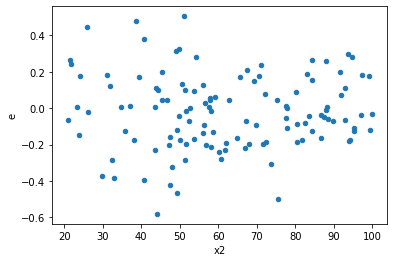

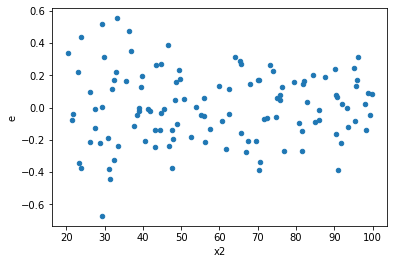

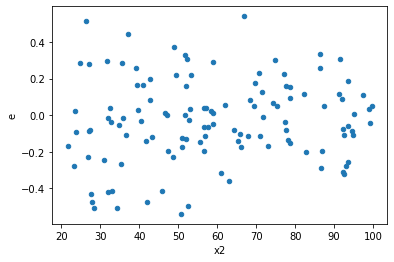

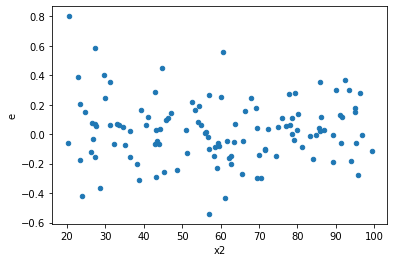

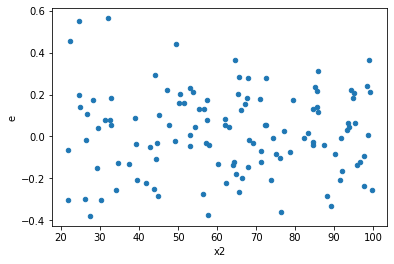

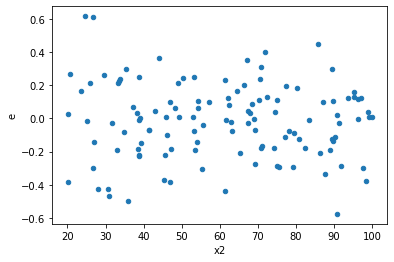

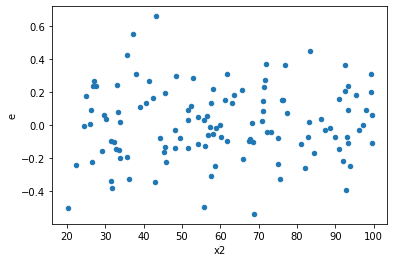

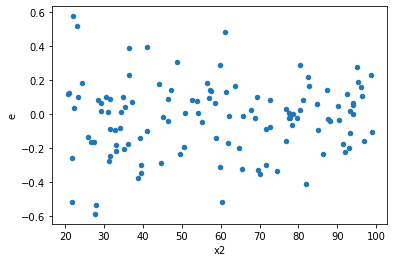

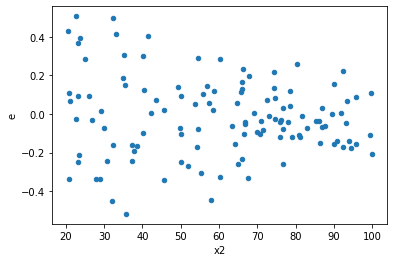

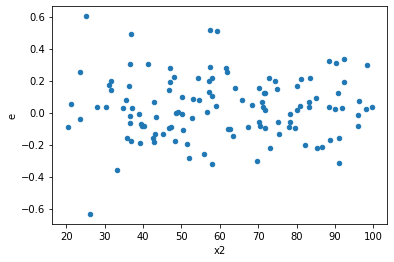

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
88.0,44.0,44.0,1.3559933513599884,1.9679769925019839,0.03081803071272701,0.044726749829590545,1.4513175824411004,0.22063246163785166,0.8896837691810742,0.11031623081892583,Reject005=1 : Homoscedasticity
602.0,44.0,44.0,1.8084556994920638,1.8572774153792382,0.0411012658975469,0.042210850349528144,1.0269963571133576,0.9299977145257996,0.5350011427371002,0.4649988572628998,Reject005=1 : Homoscedasticity
619.0,44.0,44.0,1.3192956618188303,1.3740198749702612,0.029983992314064324,0.0312277244311423,1.0414798704605654,0.8933802776708166,0.5533098611645917,0.4466901388354083,Reject005=1 : Homoscedasticity
660.0,44.0,44.0,1.6567115001248758,1.6749929364111655,0.03765253409374718,0.03806802128207194,1.0110347735769998,0.971129696375526,0.514435151812237,0.485564848187763,Reject005=1 : Homoscedasticity
690.0,44.0,44.0,1.7817495421802716,1.8648010342945065,0.040494307776824355,0.04238184168851151,1.0466123269001137,0.880576624912522,0.559711687543739,0.440288312456261,Reject005=1 : Homoscedasticity
789.0,44.0,44.0,1.3907291459419786,1.7398022078834003,0.031607480589590425,0.03954095927007728,1.2510000332990685,0.460658498701102,0.769670750649449,0.230329249350551,Reject005=1 : Homoscedasticity
893.0,44.0,44.0,1.2645198168804646,1.3009650282070735,0.028739086747283284,0.029567387004706215,1.0288213840859515,0.9253453532769447,0.5373273233615277,0.46267267663847234,Reject005=1 : Homoscedasticity
896.0,44.0,44.0,1.6527793277162801,1.7976760804740823,0.03756316653900637,0.040856274556229144,1.0876685413037035,0.7817049637235094,0.6091475181382453,0.3908524818617547,Reject005=1 : Homoscedasticity
922.0,44.0,44.0,1.605836926344698,1.6364696076272731,0.03649629378056132,0.03719249108243802,1.019075835646838,0.9503111812831744,0.5248444093584128,0.4751555906415872,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,2.8439347958805525,1.1079157398767296,0.06463488172455802,0.025179903179016583,0.38957142810782747,0.0022554033647147805,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,3.448684653052699,1.206484276861679,0.07837919666028861,0.027420097201401795,0.3498389670953898,0.0007012783473958491,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,3.0211777460436275,1.5403921392112918,0.06866313059190063,0.035008912254802085,0.5098647840990179,0.027729559503273146,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,2.4713104986714995,1.2583524594088922,0.05616614769707953,0.028598919532020275,0.5091842810061074,0.027427690158187346,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,2.2476665122625348,1.364603397209511,0.05108332982414852,0.031013713572943434,0.6071200463968656,0.10155895790300189,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,3.0563778557529755,2.049839721856994,0.06946313308529489,0.04658726640584077,0.6706761462751115,0.18916042261499486,Reject005=1 : Homoscedasticity
6.0,44.0,44.0,2.5529922247297456,1.9976510385853383,0.05802255056203967,0.045401159967848596,0.7824743919056806,0.41912817353030435,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,2.886737495591633,1.1536792128183526,0.0656076703543553,0.026219982109508013,0.39964811992089616,0.002936279759900859,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,2.975116150806143,0.5480099462309393,0.06761627615468507,0.012454771505248622,0.18419783243839052,1.2038887480800514e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    654
Reject005=1 : Homoscedasticity      346
Name: Result_test, dtype: int64